<img src="https://i.imgur.com/6U6q5jQ.png"/>





<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/introGraph/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes.

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship.

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

Grafos: la combinación de nodos y enlaces

- NoDirigidos --> Relaciones simétricas (yo soy vecino tuyo y tu mio)
Dirigidas --> Asimétricos (la relación que tengo contigo tu no necesariamente la tienes conmigo) y 

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# create nodes and edges
G.add_edges_from([(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)])

## Basic Elements

**G** is the graph:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [4]:
# You see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [5]:
# similar
G.nodes().values()

ValuesView(NodeView((1, 2, 5, 3, 4, 6)))

In [6]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

In [7]:
# You see edges items
G.edges().items()

ItemsView(EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)]))

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

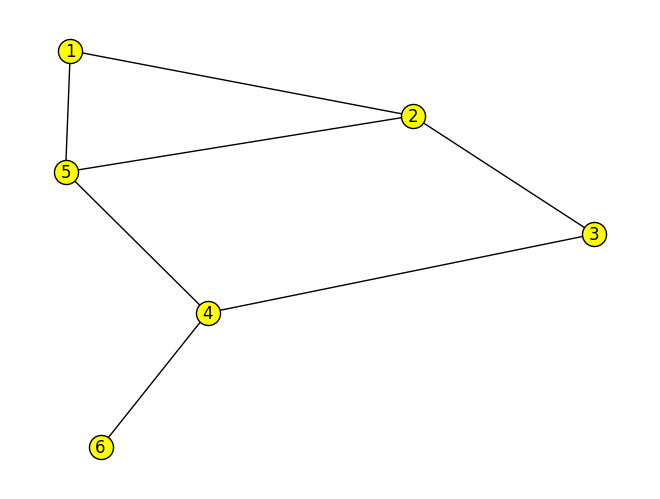

In [8]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

In [10]:
# do you have it?
#!pip install pyvis

   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   ---------------------------------------- 756.0/756.0 kB 5.3 MB/s eta 0:00:00


Notice that the position of the nodes will vary every time you re draw the graph. In fact, drawing a graph can become a challenge by itself when we need to find information via visualization.


## Interaction with Pyvis

Pyvis uses color, size, label and title attributes.

In [11]:
# dict of labels
labels={i:str(i) for i in G.nodes()}
labels # string as label

{1: '1', 2: '2', 5: '5', 3: '3', 4: '4', 6: '6'}

In [12]:
nx.set_node_attributes(G,labels,'label') # values according to id
nx.set_node_attributes(G,'red','color') # for all
G.nodes.data()

NodeDataView({1: {'label': '1', 'color': 'red'}, 2: {'label': '2', 'color': 'red'}, 5: {'label': '5', 'color': 'red'}, 3: {'label': '3', 'color': 'red'}, 4: {'label': '4', 'color': 'red'}, 6: {'label': '6', 'color': 'red'}})

In [13]:
from pyvis.network import Network

Gvis = Network('500px', '500px',notebook=True,cdn_resources='remote')
Gvis.from_nx(G.copy()) # create a copy!
Gvis.show('Gvis.html')

Gvis.html




### Edge directionality

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

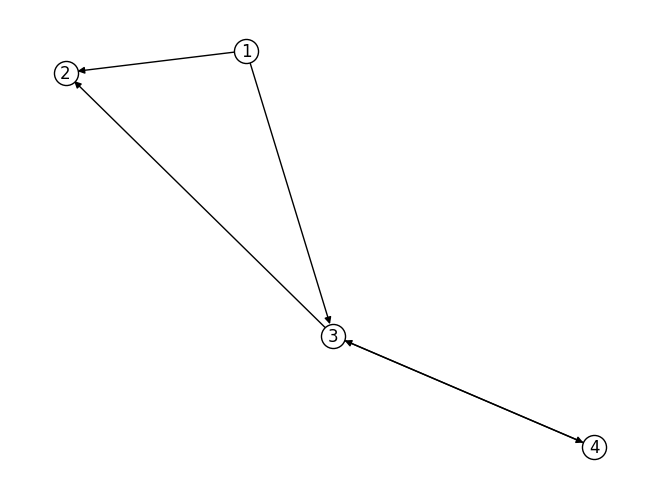

In [14]:
# create DIRECTED graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric**.

## Attributes

Nodes can have attributes:

In [15]:
# adding attributes
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='male'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='female'

In [16]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

{1: 'male', 2: 'male', 3: 'female', 4: 'female'}

Set the color of the node based on sex:

In [17]:
# requesting items to iterate
nx.get_node_attributes(dG, "sex").items()

dict_items([(1, 'male'), (2, 'male'), (3, 'female'), (4, 'female')])

In [18]:
# then
{i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

{1: 'blue', 2: 'blue', 3: 'red', 4: 'red'}

In [19]:
# so...
colors={i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

# set color
nx.set_node_attributes(dG, colors, "color")
dG.nodes.data()

NodeDataView({1: {'sex': 'male', 'color': 'blue'}, 2: {'sex': 'male', 'color': 'blue'}, 3: {'sex': 'female', 'color': 'red'}, 4: {'sex': 'female', 'color': 'red'}})

In [20]:
# since
nx.get_node_attributes(dG, "color").values()

dict_values(['blue', 'blue', 'red', 'red'])

Attributes can serve for some computational purposes, but also help to visually find structures.

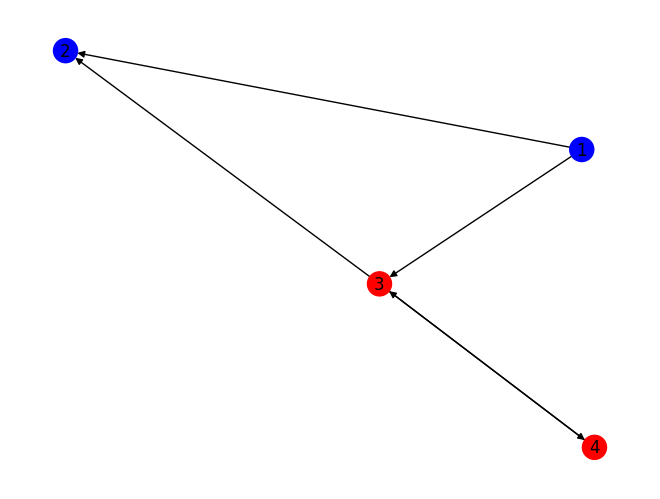

In [21]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

Of course, edges can have attributes too:

In [22]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [23]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 3}), (3, 2, {'weight': 5}), (3, 4, {'weight': 10}), (4, 3, {'weight': 0.5})])

Let me add another attribute conditional on another attribute:

In [24]:
# if
{i:'magenta' if v<=1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}

{(1, 2): 'magenta',
 (1, 3): 'grey',
 (3, 2): 'grey',
 (3, 4): 'grey',
 (4, 3): 'magenta'}

In [25]:
# then
colorEdges={i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [26]:
# see edges and attributes
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey'}), (1, 3, {'weight': 3, 'color': 'grey'}), (3, 2, {'weight': 5, 'color': 'grey'}), (3, 4, {'weight': 10, 'color': 'grey'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

Let's use edge attributes:

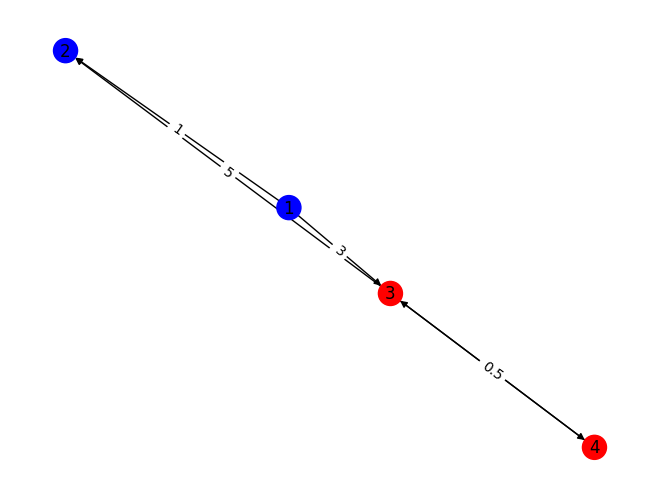

In [27]:
# use the edge attributes
# add labels to edges

pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

The color of edges:

In [28]:
nx.get_edge_attributes(dG,'color').values()

dict_values(['grey', 'grey', 'grey', 'grey', 'magenta'])

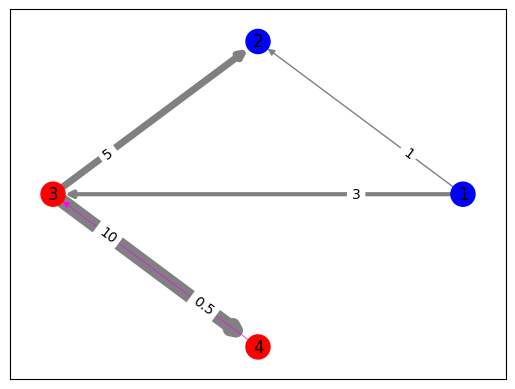

In [29]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()
node_colors=nx.get_node_attributes(dG,'color').values()
weight_values=nx.get_edge_attributes(dG,'weight')
pos = nx.circular_layout(dG)

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=node_colors)
# draw edges
nx.draw_networkx_edges(dG, pos,width=list(weight_values.values()),
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,label_pos=0.25,
                               edge_labels=weight_values)

The interactive version needs labels, we don't have them yet:

In [30]:
dG.nodes.data()[1].keys()

dict_keys(['sex', 'color'])

In [31]:
[i[2].keys() for i in dG.edges.data()][0]

dict_keys(['weight', 'color'])

In [32]:
# id as label
labels={i:str(i) for i in dG.nodes()}
nx.set_node_attributes(dG, labels, "label")

# weight as label
labels={e:str(v) for e,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG, labels, "label")

In [33]:
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey', 'label': '1'}), (1, 3, {'weight': 3, 'color': 'grey', 'label': '3'}), (3, 2, {'weight': 5, 'color': 'grey', 'label': '5'}), (3, 4, {'weight': 10, 'color': 'grey', 'label': '10'}), (4, 3, {'weight': 0.5, 'color': 'magenta', 'label': '0.5'})])

In [34]:
dGvis = Network('500px', '500px',notebook=True,cdn_resources='remote',directed=True)
dGvis.from_nx(dG.copy())
dGvis.show('dGvis.html')

dGvis.html


### Exporting

Network does not recommend its use for complex visualization. So, several times you may want to export your graph to be visualize in Gephi or something similar:

In [35]:
nx.write_gml(dG, "dG.gml")

# Case: Elites in Peru

The network we are going to build is based on the relationships studied in this paper:
<img src="https://github.com/SocialAnalytics-StrategicIntelligence/introGraph/blob/main/graphdata/paper.png?raw=1" width="900">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once in a top company board. Notice the last column is an attribute:

<img src="https://github.com/SocialAnalytics-StrategicIntelligence/introGraph/blob/main/graphdata/dataRed.png?raw=1" width="900">

This is an spreadsheet, representing the information above:

In [36]:
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vSd9tPLB5NsbG_S1_yGZSOMpnMKQdvkenQbpG2f4qCOqrvNnge1IOdj7cJ0zbeIIySeusUDqJ5y4KQW/pubhtml?gid=1176178828&single=true",1200,350)

Let's use the data from the spreadsheet to prepare our table:

In [37]:
# reading in
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/e/2PACX-1vSd9tPLB5NsbG_S1_yGZSOMpnMKQdvkenQbpG2f4qCOqrvNnge1IOdj7cJ0zbeIIySeusUDqJ5y4KQW/pub?gid=1176178828&single=true&output=csv"
FigueData = pd.read_csv(LinkToData,
                          index_col=0) #notice!!!!!

We got this:

In [38]:
FigueData.head()

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila,Multinacional
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


As intended, the family appears as the row index (not the first column of data). The family is also the column names:

In [39]:
FigueData.columns

Index(['Romero', 'Graña', 'Miro Quesada', 'Moreyra', 'Fort', 'De La Puente',
       'Wiese', 'Onrubia', 'Brescia', 'Nicolini', 'Montero', 'Picaso',
       'Bentin', 'Benavides', 'Bustamante', 'Woodman Pollit', 'Raffo',
       'Piazza', 'Berckemeyer', 'Llosa Barber', 'Beoutis Ledesma',
       'Rizo Patron', 'Montori', 'Sotomayor', 'Cilloniz', 'Ferreyros',
       'Michell', 'Wong Lu', 'Batievsky Spack', 'Matos Escalada', 'Galsky',
       'Lucioni', 'Rodriguez Rodríguez', 'Custer', 'Ikeda', 'Cogorno',
       'Arias Davila', 'Multinacional'],
      dtype='object')

The **adjacency matrix** does not need the _multinacional_ attribute column, then:

In [40]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1)

#result
adjacency

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiese,0,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Onrubia,1,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Brescia,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Nicolini,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


It is easy to turn the adjacency matrix into a graph:

In [41]:
import networkx as nx
EliteNet = nx.from_pandas_adjacency(adjacency)

Take a look at **EliteNet**:

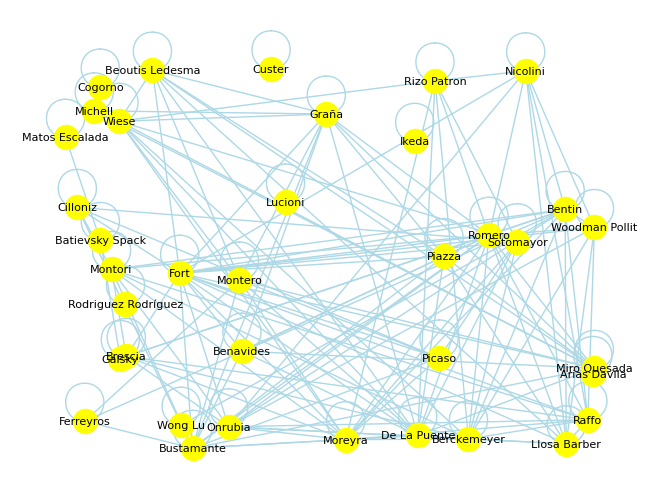

In [42]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

The adjacency include the self-relationships, we should take those away:

In [43]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

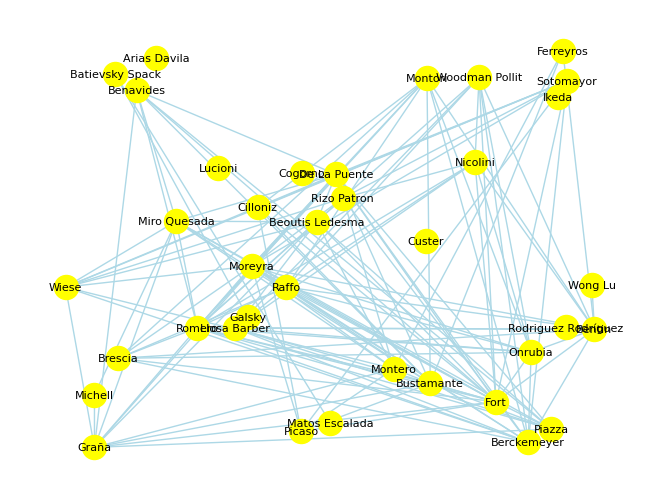

In [44]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Let's add the attributes to the nodes:

In [45]:
dict(zip(FigueData.index,FigueData['Multinacional']))

{'Romero': 1,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodríguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

Then, I can use that to add an attribute to the node:

In [46]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Setting color of node:

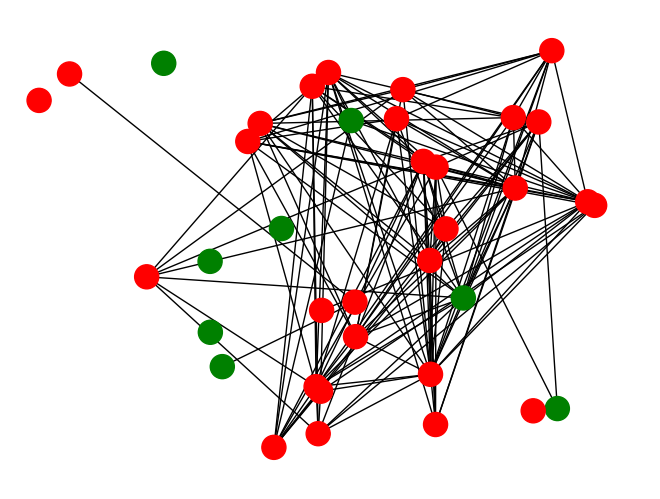

In [47]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")
nx.draw_random(EliteNet,node_color=nx.get_node_attributes(EliteNet, "color").values())

## Exploration

There several basic information we should know, specially when a visual exploration gets more complicated. Let's see:


In [48]:
# type of network
type(EliteNet)

networkx.classes.graph.Graph

In [49]:
# nodes , #edges
len(EliteNet.nodes),len(EliteNet.edges)

(37, 135)

<div class="alert alert-success" role="alert">Connectivity</div>

It is important to know if any node could contact any other node. If that is the case, the network is **connected**. This Figure shows a network not connected, that is, with several **components**.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Pseudoforest.svg/800px-Pseudoforest.svg.png" style="width:30%"/>


In [50]:
# is connected
nx.is_connected(EliteNet)

False

In [51]:
# how many CC?
len(list(nx.connected_components(EliteNet)))

8

In [52]:
# how many in each?
[len(c) for c in sorted(nx.connected_components(EliteNet), key=len, reverse=True)]

[28, 3, 1, 1, 1, 1, 1, 1]

As it can be seen, there are isolates (CC of size ONE):

In [53]:
# any isolates?
list(nx.isolates(EliteNet))

['Lucioni',
 'Rodriguez Rodríguez',
 'Custer',
 'Ikeda',
 'Cogorno',
 'Arias Davila']

<div class="alert alert-success" role="alert">Distance
</div>

The **distance** is the amount of _edges_ one node is apart from another. As there might be more than one path between two nodes, the **geodesic** is the shortest distance between them. Then, the **diameter** is the geodesic between the two nodes farthest apart in the graph.

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/diameter.png" style="width:70%">

Those are concepts applied to connected graphs!

In [54]:
# nx.diameter(EliteNet)

NetworkXError: Found infinite path length because the graph is not connected

In [55]:












#just for the largest component
largest_cc_nodes = max(nx.connected_components(EliteNet), key=len)
EliteNet_largest=EliteNet.subgraph(largest_cc_nodes)

nx.diameter(EliteNet_largest)

4

You can compute all the geodesics:

In [56]:
# geodesics
geodesics = dict(nx.all_pairs_shortest_path_length(EliteNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in EliteNet.nodes] for n in EliteNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=EliteNet.nodes, columns=EliteNet.nodes)

# we get
MatrixGeo_DF

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila
Romero,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Graña,1.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miro Quesada,1.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Moreyra,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fort,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
De La Puente,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wiese,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onrubia,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brescia,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nicolini,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# a frequency table of the geodesics
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,37.0
1.0,270.0
2.0,424.0
3.0,66.0
4.0,2.0
NaN,570.0


If we have the geodesics matrix, it is then easy to compute the **reachability matrix**:

In [58]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_10632\3592291340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})


,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila
Romero,0,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Graña,1,0,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Moreyra,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Wiese,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Onrubia,1,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
Brescia,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
Nicolini,1,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
# connectedness
nNodes=len(EliteNet.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

np.float64(0.5720720720720721)

Let's work with the largest component:

In [60]:
# geodesics
geodesics_Lcc = dict(nx.all_pairs_shortest_path_length(EliteNet_largest))

# as matrix
MatrixGeo_Lcc = [[geodesics_Lcc.get(n,{}).get(m)  for m in EliteNet_largest.nodes] for n in EliteNet_largest.nodes]

# as DF (pandas)
MatrixGeo_DF_Lcc=pd.DataFrame(MatrixGeo_Lcc,index=EliteNet_largest.nodes, columns=EliteNet_largest.nodes)

# we get
MatrixGeo_DF_Lcc

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Berckemeyer,Llosa Barber,Beoutis Ledesma,Rizo Patron,Montori,Sotomayor,Cilloniz,Ferreyros,Michell,Wong Lu
Romero,0,1,1,1,1,1,2,1,1,1,...,1,1,2,1,1,2,2,2,2,2
Graña,1,0,1,2,1,1,1,2,2,2,...,2,2,1,2,2,2,2,2,1,3
Miro Quesada,1,1,0,2,1,1,1,2,2,2,...,2,2,1,2,2,2,2,2,1,3
Moreyra,1,2,2,0,1,1,1,1,1,2,...,1,2,2,1,1,1,2,2,3,2
Fort,1,1,1,1,0,1,2,1,1,1,...,2,1,1,2,2,1,1,2,2,2
De La Puente,1,1,1,1,1,0,1,2,2,2,...,1,2,1,1,2,1,2,2,2,3
Wiese,2,1,1,1,2,1,0,2,2,2,...,1,2,1,1,2,1,2,2,2,3
Onrubia,1,2,2,1,1,2,2,0,1,1,...,1,1,2,2,1,2,2,2,3,2
Brescia,1,2,2,1,1,2,2,1,0,2,...,1,2,2,2,1,2,2,2,3,2
Nicolini,1,2,2,2,1,2,2,1,2,0,...,2,1,2,1,2,2,2,2,3,2


In [61]:
# reachability
MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})
MatrixReach_DF_Lcc

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_10632\3088296543.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})


,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Berckemeyer,Llosa Barber,Beoutis Ledesma,Rizo Patron,Montori,Sotomayor,Cilloniz,Ferreyros,Michell,Wong Lu
Romero,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Graña,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Miro Quesada,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Moreyra,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fort,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
De La Puente,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Wiese,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Onrubia,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Brescia,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Nicolini,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [62]:
# connectedness
nNodes=len(EliteNet_largest.nodes)
MatrixReach_DF_Lcc.sum().sum()/(nNodes*(nNodes-1))

np.float64(1.0)

<div class="alert alert-success" role="alert">Density </div>


The **Density** let's you know how close is the network to be completely connected.

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/density.png" style="width:70%">

In [63]:
# for our case:
nx.density(EliteNet_largest)

0.35185185185185186

Keep in mind the relationship between density and reachability:

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/reachability-and-density.png" style="width:70%">

<div class="alert alert-success" role="alert">Node Centrality </div>


<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/centrality.png" style="width:70%">

Let's compute these measures:

In [64]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.degree_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Degree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Closeness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

,Degree,Closeness,Betweenness
Romero,0.666667,0.750000,0.102156
Graña,0.407407,0.613636,0.043353
Miro Quesada,0.407407,0.613636,0.043353
Moreyra,0.555556,0.675000,0.065573
Fort,0.703704,0.771429,0.155165
De La Puente,0.518519,0.658537,0.039053
Wiese,0.333333,0.586957,0.017637
Onrubia,0.407407,0.613636,0.006340
Brescia,0.296296,0.574468,0.000747
Nicolini,0.296296,0.562500,0.005603


Visual representation:

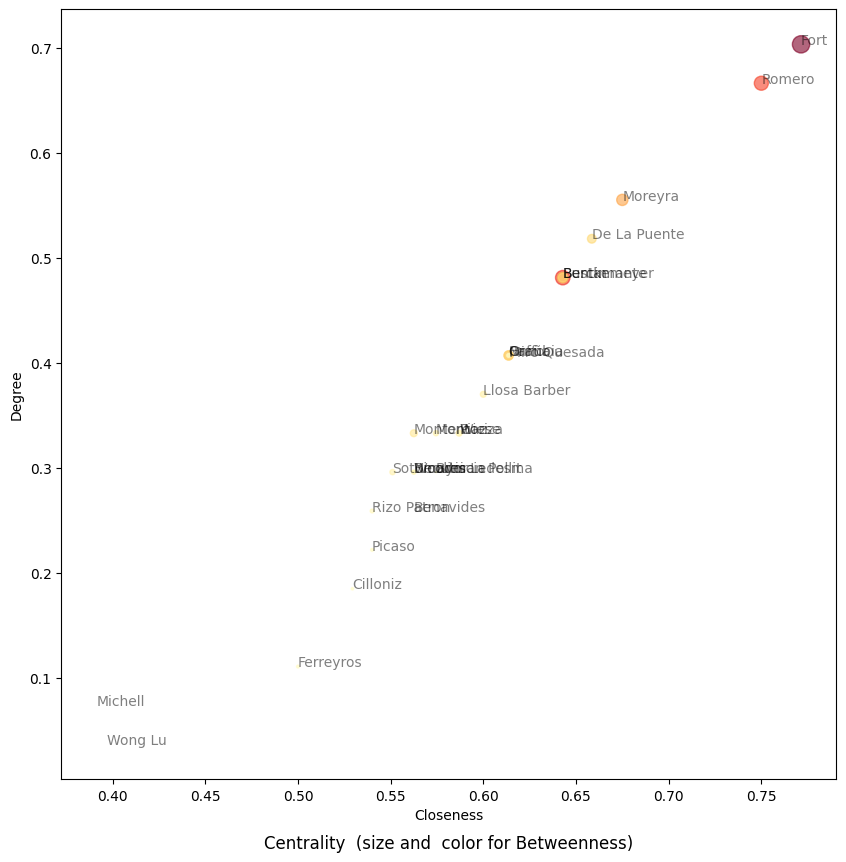

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.Closeness, actorMeasures.Degree,s=1000*actorMeasures.Betweenness,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.Closeness,actorMeasures.Degree)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)

plt.title("Centrality  (size and  color for Betweenness)", y=-0.1)
plt.xlabel("Closeness")
plt.ylabel("Degree")
plt.show()

# Case: Top Seattle

I found a webpage about top people in Seattle:

In [66]:
from IPython.display import IFrame
IFrame('https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow', 800, 350)

We have the network as **edgelist**:

In [67]:
IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVt6mWtTfzTKgjwtfbWogongjhVLSK1A1hQPsJMuYWnZqebdkkAjTwhRGBSih2ZxK_PT-dEbJ-UNMG/pubhtml', 800, 350)

Creating from edgelist:

In [70]:
#!pip install openpyxl

In [71]:

# link a GoogleDrive como un Excel
linkGoogle="https://docs.google.com/spreadsheets/d/e/2PACX-1vQVt6mWtTfzTKgjwtfbWogongjhVLSK1A1hQPsJMuYWnZqebdkkAjTwhRGBSih2ZxK_PT-dEbJ-UNMG/pub?output=xlsx"

# leyendo archivo de red
edges=pd.read_excel(linkGoogle,
                        sheet_name='edges') # la tabla tiene este nombre

# creando red dirigida
Seattle= nx.from_pandas_edgelist(edges, edge_attr=True,create_using=nx.DiGraph)

In [72]:
len(Seattle.edges())

588

In [73]:
type(Seattle)

networkx.classes.digraph.DiGraph

In directed networks, we want to know if nodes are strongly connected:

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/strongly_connected.png" style="width:70%">

In [74]:
# is connected
nx.is_strongly_connected(Seattle)

False

Since you have a directed network, the reachability analysis may include **reciprocity**:

In [75]:
nx.overall_reciprocity(Seattle)

0.6632653061224489

You can compute it for every node:

In [76]:
pd.DataFrame.from_dict(nx.reciprocity(Seattle,nodes=Seattle.nodes),orient='index').sort_values(0,ascending=False)

,0
LeslieFeinzaig,0.941176
john_gabbert,0.923077
ShaunaCausey,0.901961
toddbishop,0.828571
daryn,0.823529
MissDestructo,0.820513
juliesandler,0.807692
etzioni,0.800000
heatherredman,0.800000
rachelerman,0.800000


Also, there are differences in centrality (in / out):

In [77]:
SeattleMeasures=pd.concat([pd.DataFrame.from_dict(nx.out_degree_centrality(Seattle),
                                  orient='index',
                                  columns=['OutDegree']),
           pd.DataFrame.from_dict(nx.in_degree_centrality(Seattle),
                                  orient='index',
                                  columns=['InDegree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(Seattle.reverse()),
                                  orient='index',
                                  columns=['OutCloseness']),
           pd.DataFrame.from_dict(nx.closeness_centrality(Seattle),
                                  orient='index',
                                  columns=['InCloseness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(Seattle),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
SeattleMeasures

,OutDegree,InDegree,OutCloseness,InCloseness,Betweenness
rachelerman,0.577778,0.533333,0.703125,0.653333,0.049295
mattmcilwain,0.200000,0.288889,0.529412,0.529730,0.006917
DaveParkerSEA,0.800000,0.333333,0.833333,0.544444,0.055038
toddbishop,0.866667,0.688889,0.882353,0.739623,0.155510
ashannstew,0.333333,0.266667,0.584416,0.522667,0.003663
LeslieFeinzaig,0.355556,0.400000,0.608108,0.576471,0.010229
akipman,0.022222,0.133333,0.340909,0.483951,0.000063
matt_oppy,0.577778,0.244444,0.703125,0.515789,0.017005
gilbert,0.155556,0.355556,0.473684,0.560000,0.003672
juliesandler,0.577778,0.577778,0.703125,0.664407,0.043588


Also, **LINK-BASED** analysis is possible in directed networks,

* HITS (from "https://www.linkedin.com/pulse/hits-hubs-authorities-manish-patel/")


<img src="https://media.licdn.com/dms/image/C4E12AQHfIG5Dg1gODQ/article-cover_image-shrink_600_2000/0/1600668840613?e=2147483647&v=beta&t=q1GJ5oFlUaEastM3LotXAhrh972wjiMdUv0LtkVpkss" style="width:50%">

* PAGERANK (from "https://medium.com/analytics-vidhya/how-google-search-works-page-rank-algorithm-using-python-9643d9c9a981")

  

  <img src="https://miro.medium.com/v2/resize:fit:800/0*S8x3TYd5ApMb7CuO.jpg" style="width:50%">

In [78]:
h_dict,a_dict=nx.hits(Seattle)
pagerank_dict=nx.pagerank(Seattle)

HITS_hubs=pd.Series(h_dict,name='HITS_hubs')
HITS_authorities=pd.Series(a_dict,name="HITS_authorities")
Pagerank=pd.Series(pagerank_dict,name='Pagerank')

pd.concat([HITS_hubs,HITS_authorities,Pagerank],axis=1)

,HITS_hubs,HITS_authorities,Pagerank
rachelerman,0.043088,0.036466,0.041301
mattmcilwain,0.015900,0.022392,0.021472
DaveParkerSEA,0.052309,0.026317,0.021020
toddbishop,0.054384,0.044099,0.048878
ashannstew,0.028888,0.023696,0.016191
LeslieFeinzaig,0.028116,0.033763,0.024664
akipman,0.001001,0.009099,0.014519
matt_oppy,0.044211,0.020395,0.018806
gilbert,0.012790,0.028344,0.024512
juliesandler,0.044508,0.039565,0.038982


# Case: Trade among countries

Let me use some information about trade among countries from the [World Bank](https://wits.worldbank.org/gptad/library.aspx):

In [79]:
url = "https://wits.worldbank.org/gptad/library.aspx"
from IPython.display import IFrame
IFrame(url, 900,500)

I have previously pre processed the data. Let me open the file with _inforce_ agreements:

In [80]:
import pandas as pd
tradeDF=pd.read_pickle("https://github.com/SocialAnalytics-StrategicIntelligence/introGraph/raw/refs/heads/main/graphdata/tradeData_forGraph.pkl")
tradeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Common Name      252 non-null    object
 1   Membership       252 non-null    object
 2   Type             248 non-null    object
 3   Membership_list  252 non-null    object
 4   year_inforce_ok  252 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 10.0+ KB


The _Common Name_ is the name of the agreement. All countris involved are in a list (_Memembership_list_):

In [81]:
tradeDF.head()

,Common Name,Membership,Type,Membership_list,year_inforce_ok
0,AEC,"Algeria, Angola, Benin, Botswana, Burkina Faso...",Regional/Plurilateral Free Trade Agreement,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",1991
1,Afghanistan - India,"Afghanistan, India",Bilateral Free Trade Agreement,"[Afghanistan, India]",2003
2,Afghanistan - India,"Afghanistan, India",Bilateral Free Trade Agreement,"[Afghanistan, India]",2003
3,Albania - Turkey,"Albania, Turkey",Bilateral Free Trade Agreement,"[Albania, Turkey]",2008
4,Andean Community (CAN),"Bolivia, Colombia, Ecuador, Peru, Venezuela",Customs Union Primary Agreement,"[Bolivia, Colombia, Ecuador, Peru, Venezuela]",1988


Let me check the type of agreements we have in the data.

In [82]:
tradeDF.Type.value_counts()

Type
Bilateral Free Trade Agreement                146
Association Free Trade Agreement               55
Regional/Plurilateral Free Trade Agreement     33
Customs Union Primary Agreement                 7
Customs Union Accession Agreement               6
Framework Agreement                             1
Name: count, dtype: int64

Let me choose the 'Framework Agreement':

In [83]:
tradeDF.loc[tradeDF.Type=='Framework Agreement',:]

,Common Name,Membership,Type,Membership_list,year_inforce_ok
162,GUUAM,"Azerbaijan, Georgia, Moldova, Uzbekistan, Ukraine",Framework Agreement,"[Azerbaijan, Georgia, Moldova, Uzbekistan, Ukr...",2001


I can make a network of countries. Let me create "edges" using **Membership_list**. First, let me show you how **combinations** work:

In [84]:
from itertools import combinations

[x for x in combinations(['chile','ecuador','peru'],2)]

[('chile', 'ecuador'), ('chile', 'peru'), ('ecuador', 'peru')]

In [85]:
[x for x in combinations(['peru','ecuador','chile'],2)]

[('peru', 'ecuador'), ('peru', 'chile'), ('ecuador', 'chile')]

In [86]:
[x for x in combinations(sorted(['peru','ecuador','chile']),2)]

[('chile', 'ecuador'), ('chile', 'peru'), ('ecuador', 'peru')]

In [87]:
# all the pairs
list(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

[('Azerbaijan', 'Georgia'),
 ('Azerbaijan', 'Moldova'),
 ('Azerbaijan', 'Ukraine'),
 ('Azerbaijan', 'Uzbekistan'),
 ('Georgia', 'Moldova'),
 ('Georgia', 'Ukraine'),
 ('Georgia', 'Uzbekistan'),
 ('Moldova', 'Ukraine'),
 ('Moldova', 'Uzbekistan'),
 ('Ukraine', 'Uzbekistan')]

All the pairs above represent nodes and edges, then:

In [88]:
import networkx as nx

Framework_Agreement_Net = nx.Graph(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

In [89]:
# see edges
Framework_Agreement_Net.edges()

EdgeView([('Azerbaijan', 'Georgia'), ('Azerbaijan', 'Moldova'), ('Azerbaijan', 'Ukraine'), ('Azerbaijan', 'Uzbekistan'), ('Georgia', 'Moldova'), ('Georgia', 'Ukraine'), ('Georgia', 'Uzbekistan'), ('Moldova', 'Ukraine'), ('Moldova', 'Uzbekistan'), ('Ukraine', 'Uzbekistan')])

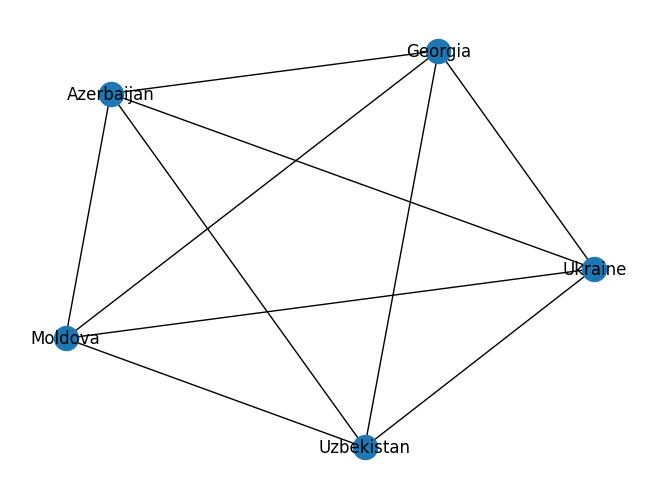

In [90]:
#draw the graph
nx.draw(Framework_Agreement_Net, with_labels=True)

Let me explore the other types:

In [91]:
tradeDF.loc[tradeDF.Type=='Customs Union Accession Agreement',:]

,Common Name,Membership,Type,Membership_list,year_inforce_ok
67,EC (10) Enlargement,"Belgium, Denmark, France, Germany, Ireland, It...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Ireland, I...",1981
68,EC (12) Enlargement,"Belgium, Denmark, France, Germany, Greece, Ire...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Greece, Ir...",1986
69,EC (15) Enlargement,"Belgium, Denmark, France, Germany, Greece, Ire...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Greece, Ir...",1995
70,EC (25) Enlargement,"Austria, Belgium, Denmark, Germany, Greece, Fi...",Customs Union Accession Agreement,"[Austria, Belgium, Denmark, Germany, Greece, F...",2004
71,EC (27) Enlargement,"Austria, Belgium, Czech Republic, Cyprus, Denm...",Customs Union Accession Agreement,"[Austria, Belgium, Czech Republic, Cyprus, Den...",2007
72,EC (9) Enlargement,"Belgium, Denmark, France, Germany, Ireland, It...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Ireland, I...",1973


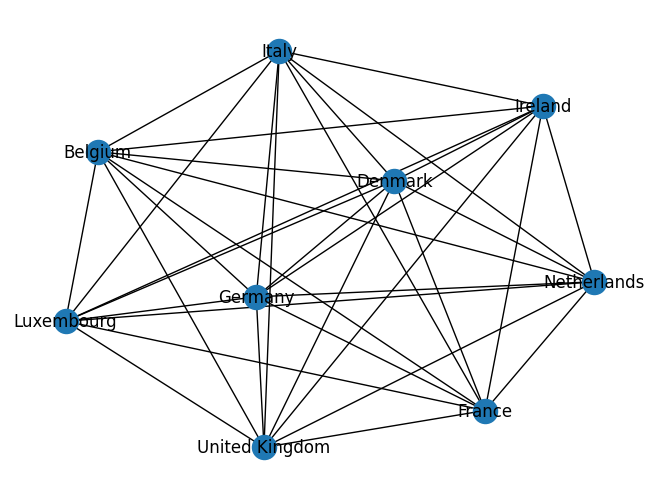

In [92]:
Accession_Agreement_Net_1973 = nx.Graph(combinations(sorted(tradeDF.loc[72,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_1973, with_labels=True)

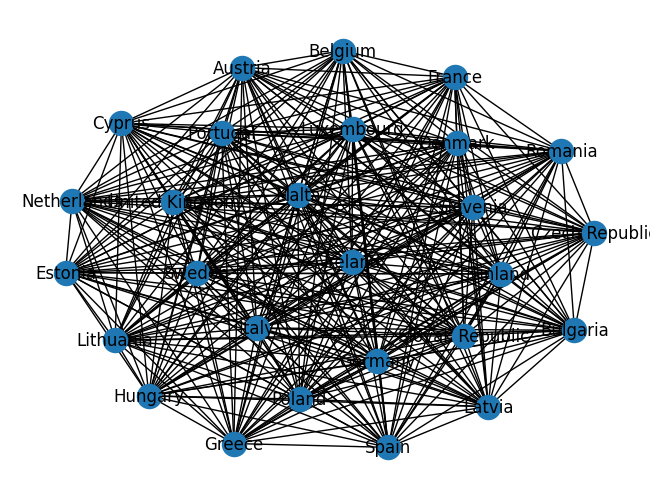

In [93]:
Accession_Agreement_Net_2007 = nx.Graph(combinations(sorted(tradeDF.loc[71,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_2007, with_labels=True)

Let´s see this other type, but only after the year 2000:

In [94]:
tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]

,Common Name,Membership,Type,Membership_list,year_inforce_ok
13,ASEAN - Australia - New Zealand,"Brunei Darussalam, Indonesia, Malaysia, Philip...",Regional/Plurilateral Free Trade Agreement,"[Brunei Darussalam, Indonesia, Malaysia, Phili...",2009
15,ASEAN - Korea,"Brunei Darussalam, Cambodia, Indonesia, Laos, ...",Regional/Plurilateral Free Trade Agreement,"[Brunei Darussalam, Cambodia, Indonesia, Laos,...",2006
33,CARICOM - Cuba,"Antigua and Barbuda, Bahamas, Barbados, Belize...",Regional/Plurilateral Free Trade Agreement,"[Antigua and Barbuda, Bahamas, Barbados, Beliz...",2001
36,CEFTA 2006,"Albania, Bosnia and Herzegovina, Bulgaria, Cro...",Regional/Plurilateral Free Trade Agreement,"[Albania, Bosnia and Herzegovina, Bulgaria, Cr...",2007
37,CEFTA Accession of Croatia,"Bulgaria, Croatia, Czech Republic, Hungary, Po...",Regional/Plurilateral Free Trade Agreement,"[Bulgaria, Croatia, Czech Republic, Hungary, P...",2003
40,Central America - Mexico,"El Salvador, Guatemala, Honduras, Mexico",Regional/Plurilateral Free Trade Agreement,"[El Salvador, Guatemala, Honduras, Mexico]",2001
45,Chile - Costa Rica (Central America) (Spanish),"Chile, Costa Rica, El Salvador, Guatemala, Hon...",Regional/Plurilateral Free Trade Agreement,"[Chile, Costa Rica, El Salvador, Guatemala, Ho...",2002
47,Chile - India,"Chile, India",Regional/Plurilateral Free Trade Agreement,"[Chile, India]",2007
74,EC - Albania,"Austria, Belgium, Denmark, Finland, France, Ge...",Regional/Plurilateral Free Trade Agreement,"[Austria, Belgium, Denmark, Finland, France, G...",2006
120,EFTA - Chile,"Iceland, Liechtenstein, Norway, Switzerland, C...",Regional/Plurilateral Free Trade Agreement,"[Iceland, Liechtenstein, Norway, Switzerland, ...",2004


Let´s keep the countries per row:

In [95]:
RFTA_countryLists=tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]['Membership_list']
RFTA_countryLists

13     [Brunei Darussalam, Indonesia, Malaysia, Phili...
15     [Brunei Darussalam, Cambodia, Indonesia, Laos,...
33     [Antigua and Barbuda, Bahamas, Barbados, Beliz...
36     [Albania, Bosnia and Herzegovina, Bulgaria, Cr...
37     [Bulgaria, Croatia, Czech Republic, Hungary, P...
40            [El Salvador, Guatemala, Honduras, Mexico]
45     [Chile, Costa Rica, El Salvador, Guatemala, Ho...
47                                        [Chile, India]
74     [Austria, Belgium, Denmark, Finland, France, G...
120    [Iceland, Liechtenstein, Norway, Switzerland, ...
123    [Iceland, Liechtenstein, Norway, Switzerland, ...
144    [Iceland, Liechtenstein, Norway, Switzerland, ...
161           [El Salvador, Guatemala, Honduras, Mexico]
163           [El Salvador, Guatemala, Honduras, Mexico]
234    [Brunei Darussalam, Chile, New Zealand, Singap...
Name: Membership_list, dtype: object

In [96]:
listOfTuples=[]
for listOfMembers in RFTA_countryLists:
    for country1, country2 in combinations(sorted(listOfMembers),2):
        listOfTuples.append((country1, country2))

# see
listOfTuples

[('Australia', 'Brunei Darussalam'),
 ('Australia', 'Indonesia'),
 ('Australia', 'Malaysia'),
 ('Australia', 'New Zealand'),
 ('Australia', 'Philippines'),
 ('Australia', 'Singapore'),
 ('Australia', 'Thailand'),
 ('Brunei Darussalam', 'Indonesia'),
 ('Brunei Darussalam', 'Malaysia'),
 ('Brunei Darussalam', 'New Zealand'),
 ('Brunei Darussalam', 'Philippines'),
 ('Brunei Darussalam', 'Singapore'),
 ('Brunei Darussalam', 'Thailand'),
 ('Indonesia', 'Malaysia'),
 ('Indonesia', 'New Zealand'),
 ('Indonesia', 'Philippines'),
 ('Indonesia', 'Singapore'),
 ('Indonesia', 'Thailand'),
 ('Malaysia', 'New Zealand'),
 ('Malaysia', 'Philippines'),
 ('Malaysia', 'Singapore'),
 ('Malaysia', 'Thailand'),
 ('New Zealand', 'Philippines'),
 ('New Zealand', 'Singapore'),
 ('New Zealand', 'Thailand'),
 ('Philippines', 'Singapore'),
 ('Philippines', 'Thailand'),
 ('Singapore', 'Thailand'),
 ('Brunei Darussalam', 'Cambodia'),
 ('Brunei Darussalam', 'Indonesia'),
 ('Brunei Darussalam', 'Korea'),
 ('Brunei Da

Let's count each time a tuple happens:

In [97]:
pd.Series(listOfTuples).value_counts().reset_index()

,index,count
0,"(El Salvador, Guatemala)",4
1,"(El Salvador, Honduras)",4
2,"(Guatemala, Honduras)",4
3,"(El Salvador, Mexico)",3
4,"(Guatemala, Mexico)",3
...,...,...
430,"(Indonesia, New Zealand)",1
431,"(New Zealand, Philippines)",1
432,"(New Zealand, Thailand)",1
433,"(Brunei Darussalam, Cambodia)",1


We can prepare a dataframe:

In [99]:
newNames={'index':'countryTuple',	'count':'weight'}
tuplesAndWeights=pd.DataFrame(pd.Series(listOfTuples).value_counts()).reset_index(drop=False).rename(columns=newNames)
tuplesAndWeights

,countryTuple,weight
0,"(El Salvador, Guatemala)",4
1,"(El Salvador, Honduras)",4
2,"(Guatemala, Honduras)",4
3,"(El Salvador, Mexico)",3
4,"(Guatemala, Mexico)",3
...,...,...
430,"(Indonesia, New Zealand)",1
431,"(New Zealand, Philippines)",1
432,"(New Zealand, Thailand)",1
433,"(Brunei Darussalam, Cambodia)",1


Let's create separate columns:

In [100]:
tuplesAndWeights[['country1','country2']]=tuplesAndWeights['countryTuple'].to_list()
tuplesAndWeights

,countryTuple,weight,country1,country2
0,"(El Salvador, Guatemala)",4,El Salvador,Guatemala
1,"(El Salvador, Honduras)",4,El Salvador,Honduras
2,"(Guatemala, Honduras)",4,Guatemala,Honduras
3,"(El Salvador, Mexico)",3,El Salvador,Mexico
4,"(Guatemala, Mexico)",3,Guatemala,Mexico
...,...,...,...,...
430,"(Indonesia, New Zealand)",1,Indonesia,New Zealand
431,"(New Zealand, Philippines)",1,New Zealand,Philippines
432,"(New Zealand, Thailand)",1,New Zealand,Thailand
433,"(Brunei Darussalam, Cambodia)",1,Brunei Darussalam,Cambodia


In [101]:
RFTA_net=nx.from_pandas_edgelist(tuplesAndWeights, source='country1',target='country2',edge_attr=["weight"])

In [102]:
RFTA_net.edges.data()

EdgeDataView([('El Salvador', 'Guatemala', {'weight': 4}), ('El Salvador', 'Honduras', {'weight': 4}), ('El Salvador', 'Mexico', {'weight': 3}), ('El Salvador', 'Chile', {'weight': 1}), ('El Salvador', 'Costa Rica', {'weight': 1}), ('El Salvador', 'Nicaragua', {'weight': 1}), ('Guatemala', 'Honduras', {'weight': 4}), ('Guatemala', 'Mexico', {'weight': 3}), ('Guatemala', 'Chile', {'weight': 1}), ('Guatemala', 'Costa Rica', {'weight': 1}), ('Guatemala', 'Nicaragua', {'weight': 1}), ('Honduras', 'Mexico', {'weight': 3}), ('Honduras', 'Chile', {'weight': 1}), ('Honduras', 'Costa Rica', {'weight': 1}), ('Honduras', 'Nicaragua', {'weight': 1}), ('Iceland', 'Liechtenstein', {'weight': 3}), ('Iceland', 'Norway', {'weight': 3}), ('Iceland', 'Switzerland', {'weight': 3}), ('Iceland', 'Chile', {'weight': 1}), ('Iceland', 'Lesotho', {'weight': 1}), ('Iceland', 'Namibia', {'weight': 1}), ('Iceland', 'Egypt', {'weight': 1}), ('Iceland', 'Botswana', {'weight': 1}), ('Iceland', 'South Africa', {'weigh

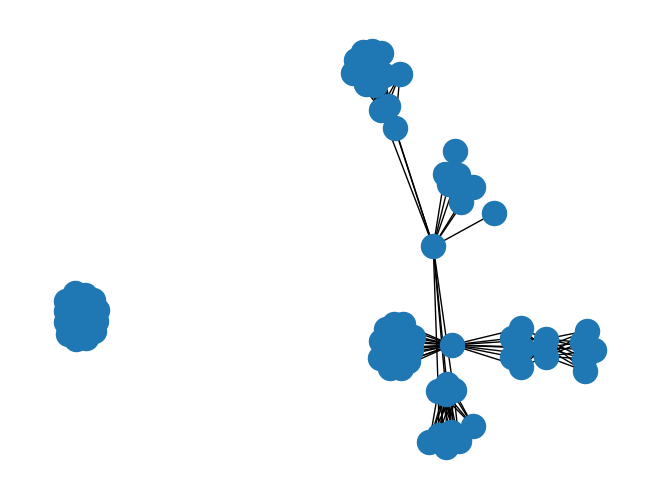

In [103]:
nx.draw(RFTA_net)

In [104]:
len(RFTA_net.nodes()),len(RFTA_net.edges())

(76, 435)

We are not supposed to have isolates:

In [105]:
list(nx.isolates(RFTA_net))

[]

There should not be self loops:

In [107]:
nx.number_of_selfloops(RFTA_net)
RFTA_net.remove_edges_from(nx.selfloop_edges(RFTA_net))